## 0) Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

## 1) Lendo o arquivo

Fonte Kaggle:https://www.kaggle.com/berkerisen/wind-turbine-scada-dataset


In [2]:
turbina = pd.read_csv('T1.csv')

turbina.columns = ['Data/Hora', 'ActivePower(kW)', 'WindSpeed(m/s)','CurvaTeórica(KWh)', 'DireçaoVento']

turbina= turbina.drop('DireçaoVento',axis=1)

turbina['Data/Hora'] = pd.to_datetime(turbina['Data/Hora'])

display(turbina)

,Data/Hora,ActivePower(kW),WindSpeed(m/s),CurvaTeórica(KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


## 2) Plotando os dados em um gráfico - Real

<AxesSubplot:xlabel='WindSpeed(m/s)', ylabel='ActivePower(kW)'>

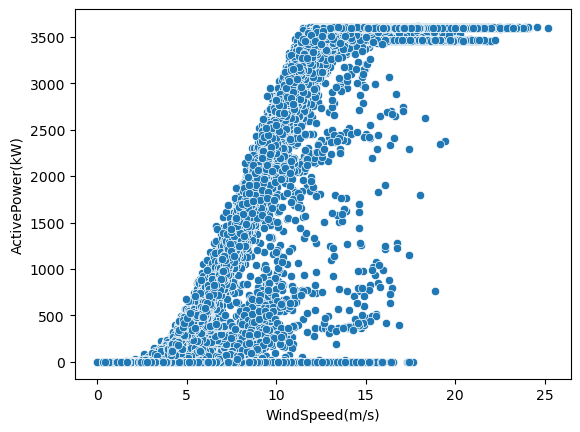

In [4]:
sns.scatterplot(data=turbina,x='WindSpeed(m/s)',y='ActivePower(kW)')


## 3) Plotando os dados em um gráfico - Teórica

<AxesSubplot:xlabel='WindSpeed(m/s)', ylabel='CurvaTeórica(KWh)'>

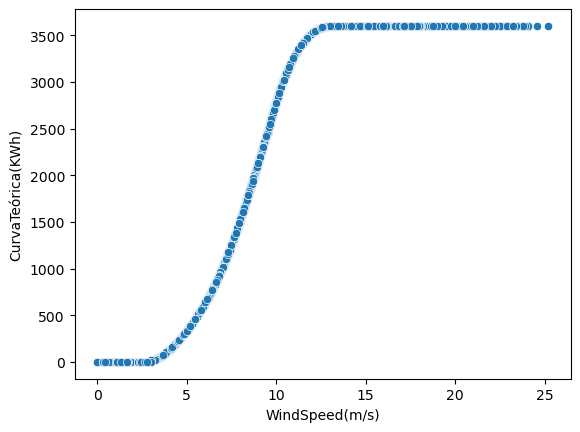

In [5]:
sns.scatterplot(data=turbina,x='WindSpeed(m/s)',y='CurvaTeórica(KWh)')

## 4) Criando "limites aceitáveis"

In [26]:
pot_real= turbina['ActivePower(kW)'].tolist()
pot_teorica =  turbina['CurvaTeórica(KWh)'].tolist()
pot_max= []
pot_min= []
dentro_limite= []

for potencia in pot_teorica:
    pot_max.append(potencia* 1.05)
    pot_min.append(potencia*0.95)
    
    
for p,potencia in enumerate(pot_real):
    if potencia>= pot_min[p] and potencia <= pot_max[p]:
        dentro_limite.append('Dentro') 
        
    elif potencia == 0:
        dentro_limite.append('Zero')    
        
    else:
        dentro_limite.append('Fora')
        
print(dentro_limite.count('Dentro')/ len(dentro_limite))       
       

0.37286760340391845


## 5) Adicionando lista "dentro_limite" ao dataframe:

In [27]:
turbina['DentroLimite'] = dentro_limite
display(turbina)

,Data/Hora,ActivePower(kW),WindSpeed(m/s),CurvaTeórica(KWh),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


## 6) Plotando novamente o gráfico:

<AxesSubplot:xlabel='WindSpeed(m/s)', ylabel='ActivePower(kW)'>

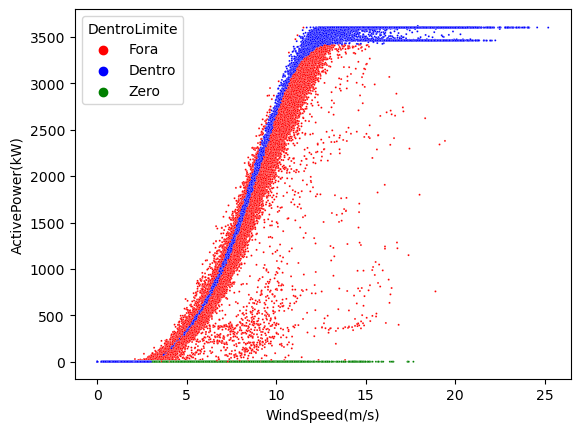

In [38]:
cores= {'Dentro': 'blue', 'Fora' : 'red', 'Zero': 'green'}
sns.scatterplot(data=turbina,x= 'WindSpeed(m/s)',y='ActivePower(kW)',hue='DentroLimite',s= 2, palette=cores)